In [9]:
import random

def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

class DailyRoutineFSM:
    def __init__(self):
        self.start = self._create_start()
        self.sleeping = self._create_sleeping()
        self.eating = self._create_eating()
        self.working = self._create_working()
        self.relaxing = self._create_relaxing()
        self.dead = self._create_dead()

        self.current_state = self.start
        self.stopped = False

        self.hunger = ['hunger', 10]
        self.mental_health = ['mental issues', 10]
        self.fatigue = ['exhaustion', 1]


    def send(self, hour):
        try:

            if self.hunger[1] and self.mental_health[1] and self.fatigue[1]:
                self.current_state.send(hour)
            else:
                self.current_state = self.dead
                self.current_state.send(hour)


        except StopIteration:
            self.stopped = True

    def is_day_over(self):
        return self.stopped

    @prime
    def _create_start(self):
        while True:
            hour = yield
            self.current_state = self.sleeping

    @prime
    def _create_sleeping(self):
        while True:
            hour = yield
            if hour%24 == 8 and random.random() > 0.85:
                print('You just woke up and gonna eat the breakfast')
                self.current_state = self.eating
            elif hour%24 == 9:
                print('You overslept!')
                self.current_state = self.working
                self.mental_health[1] -= 5
            else:
                print('You are sleeping...')
                self.fatigue[1] += 2



    @prime
    def _create_eating(self):
        while True:
            hour = yield
            self.fatigue[1] -= 0.5
            if random.random() > 0.5:
                print('You are eating...')
                self.hunger[1] += 5
            else:
                print('You have no food...')
            if 9 < hour%24 < 18:
                self.current_state = self.working
            
            elif hour%24 >= 18:
                self.current_state = self.relaxing

    @prime
    def _create_working(self):
        while True:
            hour = yield
            self.hunger[1] -= 1
            self.fatigue[1] -= 1
            self.mental_health[1] -= 0.5
            print('You are working...')

            if self.hunger[1] < 3:
                self.current_state = self.eating

            if hour%24 == 18:
                self.current_state = self.relaxing

    @prime
    def _create_relaxing(self):
        while True:
            hour = yield
            self.hunger[1] -= 0.5
            self.fatigue[1] += 1
            self.mental_health[1] += 1.5
            print('You are having a rest...')
            if self.hunger[1] < 3:
                self.current_state = self.eating
            if hour%24 == 22:
                print("It's time to sleep, good night!")
                self.current_state = self.sleeping

    @prime
    def _create_dead(self):
        while True:
            hour = yield
            death_condition = ",".join([condition[0] for condition in (self.hunger, self.fatigue, self.mental_health) if condition[1] <= 0])
            print(f'You died of {death_condition}')
            self.stopped = True


    def __repr__(self) -> str:
        return f'(hunger: {self.hunger[1]}, mental health: {self.mental_health[1]}, fatigue: {self.fatigue[1]})'
    
    def begin(self):
        hour = 0
        while True:
            print('_________________________________________________________________\n')
            print("Day:", (hour//24) + 1, "Hour:", hour%24, repr(fsm))
            self.send(hour)
            if self.current_state == self.dead:
                break
            hour += 1
        print(f'\n\nYou survived a total of {hour} hours')



if __name__ == "__main__":
    # fsm = DailyRoutineFSM(48)
    # fsm.send(None)

    # for hour in range(1, 48):

    #     print('_________________________________________________________________\n')

    #     print("Day:", (hour//24) + 1, "Hour:", hour%24, repr(fsm))

    #     fsm.send(hour)

    #     if fsm.is_day_over():
    #         break

    # print(f'\n\nYou survived a total of {hour} hours')
    fsm = DailyRoutineFSM()

    fsm.begin()



_________________________________________________________________

Day: 1 Hour: 0 (hunger: 10, mental health: 10, fatigue: 1)
_________________________________________________________________

Day: 1 Hour: 1 (hunger: 10, mental health: 10, fatigue: 1)
You are sleeping...
_________________________________________________________________

Day: 1 Hour: 2 (hunger: 10, mental health: 10, fatigue: 3)
You are sleeping...
_________________________________________________________________

Day: 1 Hour: 3 (hunger: 10, mental health: 10, fatigue: 5)
You are sleeping...
_________________________________________________________________

Day: 1 Hour: 4 (hunger: 10, mental health: 10, fatigue: 7)
You are sleeping...
_________________________________________________________________

Day: 1 Hour: 5 (hunger: 10, mental health: 10, fatigue: 9)
You are sleeping...
_________________________________________________________________

Day: 1 Hour: 6 (hunger: 10, mental health: 10, fatigue: 11)
You are sleeping.

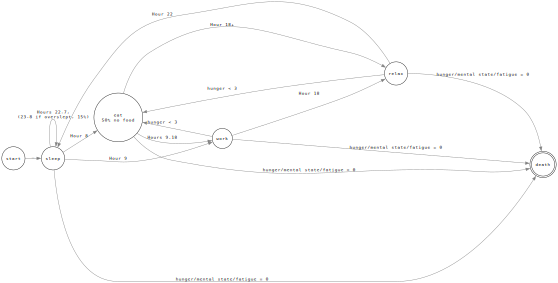

In [186]:
from graphviz import Source
with open("fsm.dot", "r") as f:
    gr = Source(f.read())
gr
